In [4]:
import pandas as pd
import numpy as np

# load spc_astro_data.csv
spx_dates_df = pd.read_csv('spx_astro_data.csv')
# make data as index 
spx_dates_df.set_index('Date', inplace=True)
# if value  > 0 then 1 else 0
# spx_dates_df['change_pc']= np.where(spx_dates_df['change_pc']>0,1,0)
# spx_dates_df['change_pc_day']= np.where((spx_dates_df['Close']-spx_dates_df['Open'])>0,1,0)


,Close,change_pc,Rahu_Sign
Date,,,
1928-01-03 00:00:00-05:00,17.760000,0.566254,Taurus
1928-01-04 00:00:00-05:00,17.719999,-0.225230,Taurus
1928-01-05 00:00:00-05:00,17.549999,-0.959368,Taurus
1928-01-06 00:00:00-05:00,17.660000,0.626784,Taurus
1928-01-09 00:00:00-05:00,17.500000,-0.906001,Taurus


In [5]:
rahudf=spx_dates_df[['Close','change_pc','Rahu_Sign']]
# rahudf.set_index('Date', inplace=True)
rahudf.head()


,Close,change_pc,Rahu_Sign
Date,,,
1928-01-03 00:00:00-05:00,17.760000,0.566254,Taurus
1928-01-04 00:00:00-05:00,17.719999,-0.225230,Taurus
1928-01-05 00:00:00-05:00,17.549999,-0.959368,Taurus
1928-01-06 00:00:00-05:00,17.660000,0.626784,Taurus
1928-01-09 00:00:00-05:00,17.500000,-0.906001,Taurus


In [13]:
# Calculate start and end date for each Rahu_Sign period
# Reset index to make Date a column
rahudf_temp = rahudf.reset_index()

# Detect when Rahu_Sign changes
rahudf_temp['sign_change'] = (rahudf_temp['Rahu_Sign'] != rahudf_temp['Rahu_Sign'].shift(1))

# Create a group number for each continuous period of same sign
rahudf_temp['group'] = rahudf_temp['sign_change'].cumsum()

# Group by group number and get start date, end date, sign, and sum of change_pc
rahu_periods = rahudf_temp.groupby('group').agg({
    'Date': ['min', 'max'],
    'Rahu_Sign': 'first',
    'change_pc': 'sum'
}).reset_index(drop=True)

# Flatten column names
rahu_periods.columns = ['Start_Date', 'End_Date', 'Rahu_Sign', 'Total_Change_PC']

rahu_periods

,Start_Date,End_Date,Rahu_Sign,Total_Change_PC
0,1928-01-03 00:00:00-05:00,1929-04-12 00:00:00-05:00,Taurus,37.034978
1,1929-04-15 00:00:00-05:00,1930-10-30 00:00:00-05:00,Aries,-27.779608
2,1930-10-31 00:00:00-05:00,1932-05-18 00:00:00-04:00,Pisces,-102.356788
3,1932-05-19 00:00:00-04:00,1933-12-05 00:00:00-05:00,Aquarius,83.829142
4,1933-12-06 00:00:00-05:00,1935-06-24 00:00:00-04:00,Capricorn,8.739504
...,...,...,...,...
59,2019-03-07 00:00:00-05:00,2020-09-22 00:00:00-04:00,Gemini,24.121715
60,2020-09-23 00:00:00-04:00,2022-04-11 00:00:00-04:00,Taurus,30.442214
61,2022-04-12 00:00:00-04:00,2023-10-27 00:00:00-04:00,Aries,-3.866255
62,2023-10-30 00:00:00-04:00,2025-05-16 00:00:00-04:00,Pisces,39.228827


In [22]:
# Start date should be string  sub striing still the date
rahu_periods['Start_Date'] = rahu_periods['Start_Date'].astype(str).str[:7]
rahu_periods=rahu_periods[['Start_Date','Rahu_Sign','Total_Change_PC']]
rahu_periods

,Start_Date,Rahu_Sign,Total_Change_PC
0,1928-01,Taurus,37.034978
1,1929-04,Aries,-27.779608
2,1930-10,Pisces,-102.356788
3,1932-05,Aquarius,83.829142
4,1933-12,Capricorn,8.739504
...,...,...,...
59,2019-03,Gemini,24.121715
60,2020-09,Taurus,30.442214
61,2022-04,Aries,-3.866255
62,2023-10,Pisces,39.228827


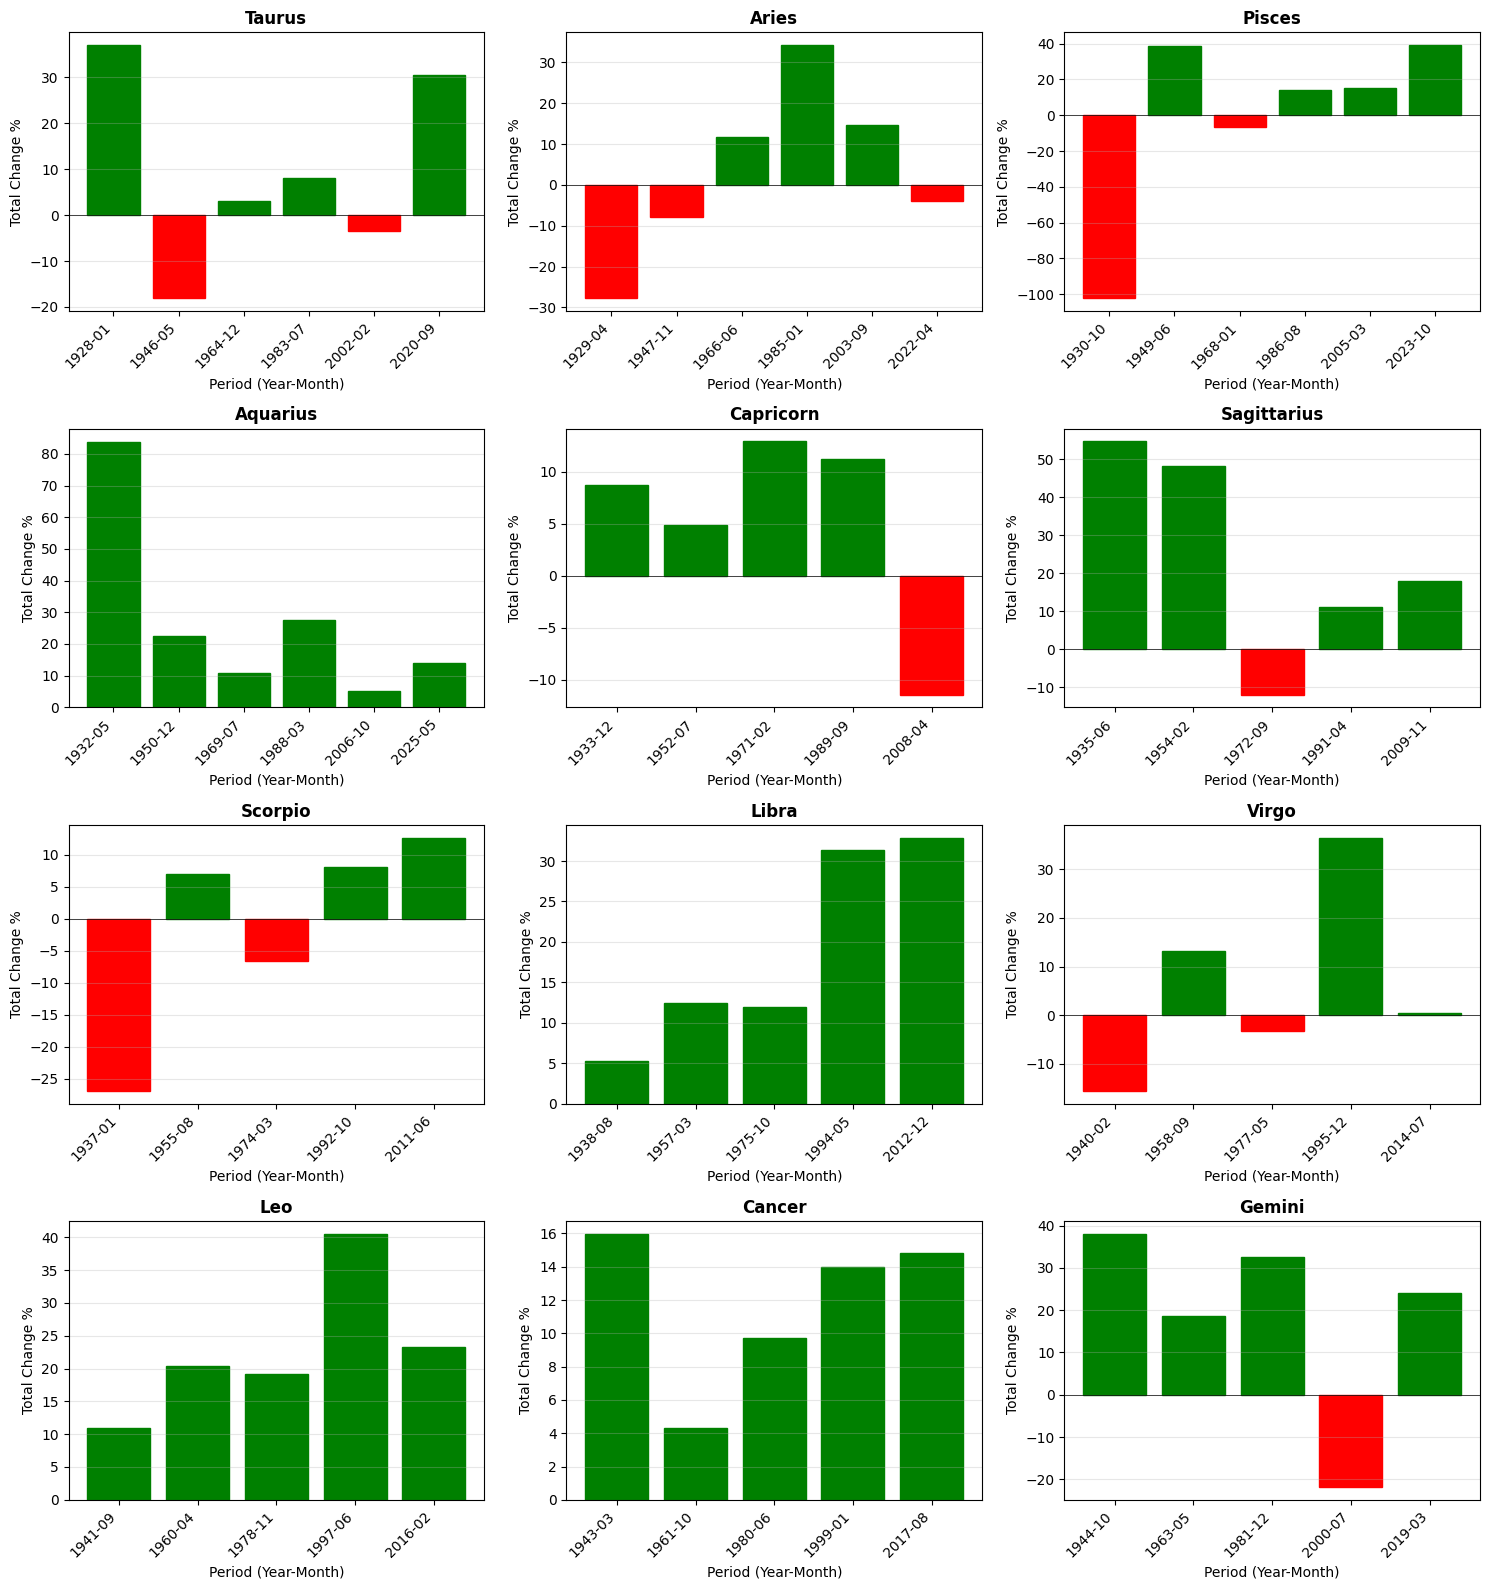

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique Rahu signs
unique_signs = rahu_periods['Rahu_Sign'].unique()

# Calculate number of rows needed (3 columns per row)
n_signs = len(unique_signs)
n_cols = 3
n_rows = (n_signs + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_signs > 1 else [axes]

# Plot each sign
for idx, sign in enumerate(unique_signs):
    # Filter data for this sign
    sign_data = rahu_periods[rahu_periods['Rahu_Sign'] == sign].copy()
    
    # Plot
    ax = axes[idx]
    bars = ax.bar(range(len(sign_data)), sign_data['Total_Change_PC'])
    
    # Color bars individually based on positive/negative
    for i, val in enumerate(sign_data['Total_Change_PC']):
        bars[i].set_color('green' if val > 0 else 'red')
    
    ax.set_title(f'{sign}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Period (Year-Month)')
    ax.set_ylabel('Total Change %')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax.grid(axis='y', alpha=0.3)
    
    # Set x-ticks with yyyy-mm labels
    ax.set_xticks(range(len(sign_data)))
    ax.set_xticklabels(sign_data['Start_Date'], rotation=45, ha='right')

# Hide unused subplots
for idx in range(n_signs, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()